----

# MODEL FITNESS MACHINE LEARNING

## Download and analyze the data


In [2]:
import pandas as pd #para limpiar ver y extraer data
from sklearn.preprocessing import StandardScaler #para estandarizar datos
#from sklearn.cluster import KMeans 
import seaborn as sns #para graficar
from matplotlib import pyplot as plt #para graficar
from sklearn.model_selection import train_test_split #para separar el modelo a entrenar
from sklearn.linear_model import LogisticRegression # para regresion logistica
from sklearn.ensemble import RandomForestClassifier #para bosque aleatorio
from sklearn.metrics import accuracy_score, precision_score, recall_score #medicion para estartegia
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix, ConfusionMatrixDisplay
from scipy.cluster.hierarchy import dendrogram, linkage #dendograma
from sklearn.cluster import KMeans #segmentacion

In [3]:
df = pd.read_csv("datasets/gym_churn_us.csv")

Data loaded successfully

## Exploratory Data Analysis (EDA)


Verified and evidenced that there are no null values. The next step is to lowercase the column headers to standardize data handling.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.head(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0


Regarding data handling and types, it is accurate as the majority are binary and represented as integers, with non-binary data marked as float.

In [6]:
old_columns = df.columns
new_columns=[]

for columns in old_columns:
    low = columns.lower()
    strip = low.strip()
    new_columns.append(strip)
    

df.columns=new_columns
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Titles changed for efficient handling and error prevention.

In [7]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


With '1' interpreted as a positive indicator, notable trends are observed. The 'phone' category shows a high mean of 0.90, implying that the majority of respondents shared their phone details. Moreover, the data confirms that a significant portion of the workforce lives nearby, which is in line with expectations.

### Grouping and Analysis Based on 'Churn'

In [8]:
df.groupby(['churn']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Grouping and Analysis Based on 'Churn'

Trends were grouped and analyzed based on whether users churned (1) or not (0).

-   Regarding **gender**, the data suggests it appears to be indifferent to churn.
-   In terms of **location**, users residing nearby tend to remain subscribed.
-   For the **partner program**, those not participating show a higher tendency to churn, potentially because members of the program may not directly pay for the membership.
-   Concerning **'promo friends'**, users who attend with another person show a greater tendency to stay.
-   Providing **phone number** information appears to be indifferent to churn.
-   Regarding **contract duration**, individuals with longer-term packages are clearly more loyal, suggesting a recommendation to add promotions for 3 or 6-month plans.
-   **Group sessions** also tend to generate user retention.
-   **Age** is not as impactful, but further evaluation is needed to understand why younger users decide to leave. This could be related to changes in residence or the technology used becoming outdated, making it an important aspect to review.
-   In relation to **age and economic status**, individuals with higher purchasing power tend to stay. This could correlate with age, or alternatively, the prices of extra services might be too high, causing younger individuals to switch gyms.
-   Another relevant aspect is the **frequency of class attendance**. Users who do not take classes tend to cancel their subscriptions more often compared to those who attend more frequently.
-   An extremely valuable indicator is **lifetime**, where we observe high loyalty among customers who stay longer than 4 months. Conversely, those who churn, on average, do not even complete a month.

Considering the above, features not stored in binary format and relevant to the analysis will be visualized using histograms to obtain analyzable distribution plots.

### Histogram Analysis

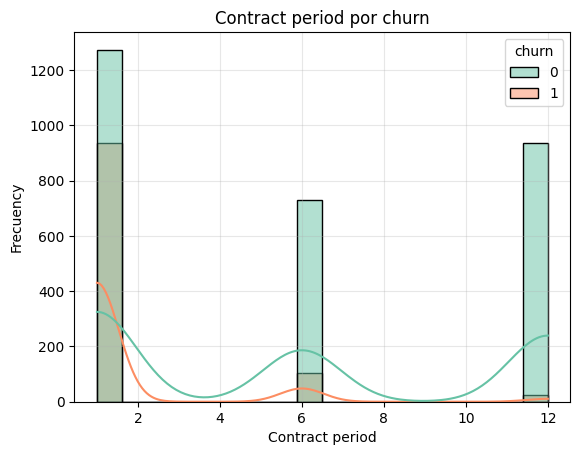

In [9]:
sns.histplot(data=df , x='contract_period' , hue='churn' , kde=True ,palette ='Set2', alpha=0.5)
plt.title('Contract period por churn')
plt.xlabel('Contract period')
plt.ylabel('Frecuency')
plt.grid(True,alpha=0.3)
plt.show()

The data clearly indicates a strong tendency for churn within the first month among those with shorter-term plans. Conversely, loyal customers with long-term contracts remain with the gym.

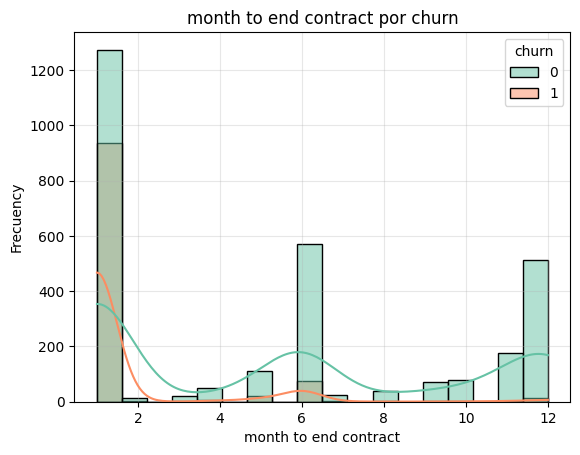

In [10]:
sns.histplot(data=df , x='month_to_end_contract' , hue='churn' , kde=True ,palette ='Set2', alpha=0.5)
plt.title('month to end contract por churn')
plt.xlabel('month to end contract')
plt.ylabel('Frecuency')
plt.grid(True,alpha=0.3)
plt.show()

Similarly, a clear trend emerges: customers with only one month remaining on their contract exhibit a higher frequency of churn.

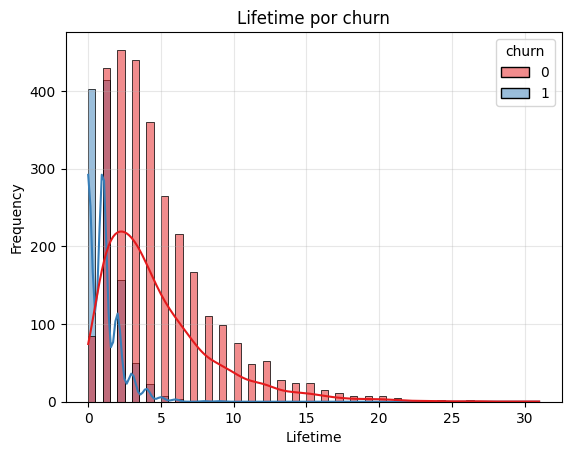

In [36]:
sns.histplot(data=df , x='lifetime' , hue='churn' , kde=True ,palette ='Set1', alpha=0.5)
plt.title('Lifetime por churn')
plt.xlabel('Lifetime')
plt.ylabel('Frequency')
plt.grid(True,alpha=0.3)
plt.show()

This is crucial for visualizing the division of groups. Notably, those with 1 month of gym membership exhibit a strong propensity to churn.

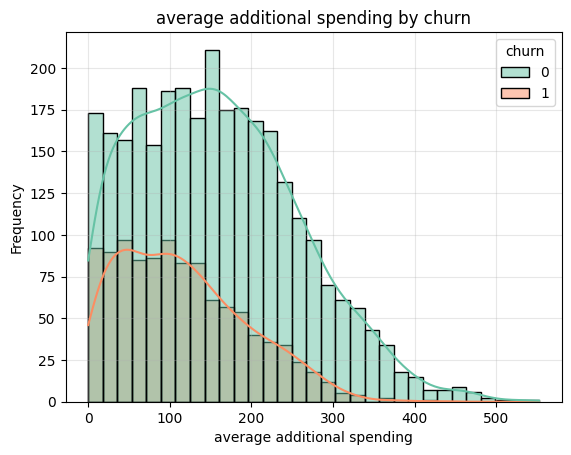

In [37]:
sns.histplot(data=df , x='avg_additional_charges_total' , hue='churn' , kde=True ,palette ='Set2', alpha=0.5)
plt.title('average additional spending by churn')
plt.xlabel('average additional spending')
plt.ylabel('Frequency')
plt.grid(True,alpha=0.3)
plt.show()

Customers with a high spending volume are loyal, suggesting two hypotheses: either the prices are too high, causing lower-income individuals to leave, or the additional services are so valuable that those who utilize them tend to stay.

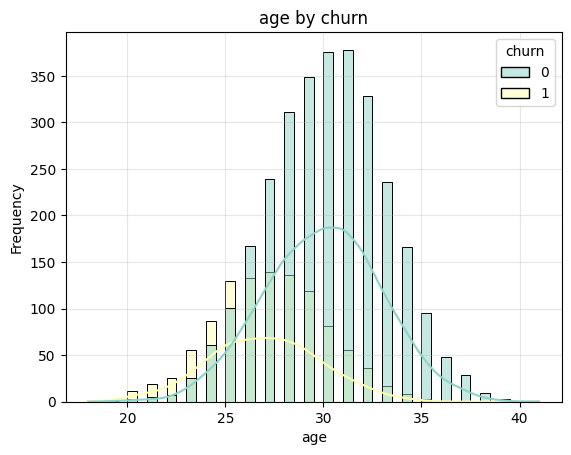

In [40]:
sns.histplot(data=df , x='age' , hue='churn' , kde=True ,palette ='Set3', alpha=0.5)
plt.title('age by churn')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.grid(True,alpha=0.3)
plt.show()

We are experiencing challenges with young customer retention, making a detailed assessment of this demographic crucial for future strategy.

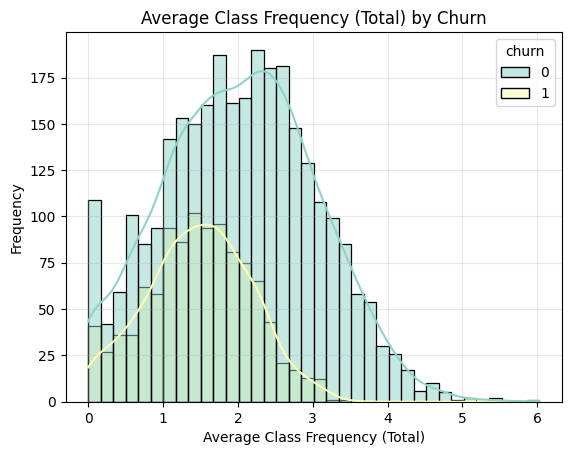

In [41]:
sns.histplot(data=df, x='avg_class_frequency_total', hue='churn', kde=True, palette='Set3', alpha=0.5)
plt.title('Average Class Frequency (Total) by Churn')
plt.xlabel('Average Class Frequency (Total)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

Unsurprisingly, members with higher attendance rates demonstrate greater retention. Lower attendance, possibly driven by distance or time limitations, appears to be a significant predictor of churn, particularly for those attending only one or two days weekly.

### Distribution Matrix Analysis

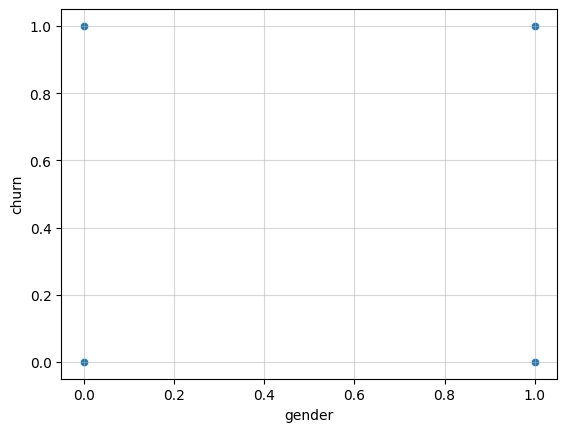

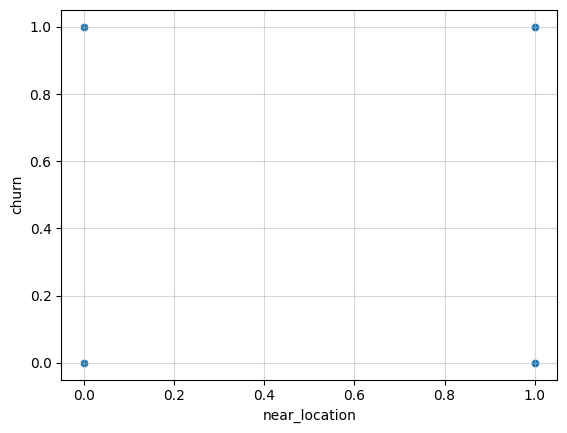

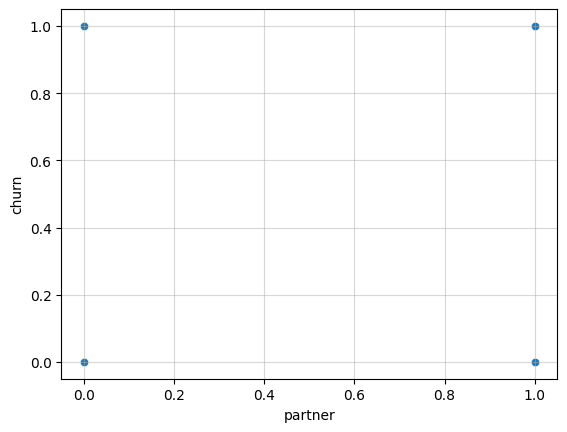

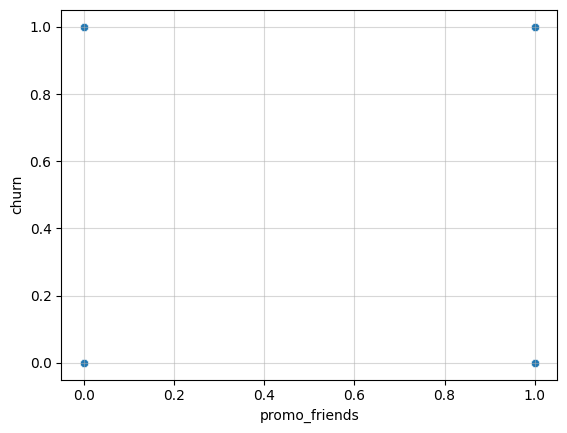

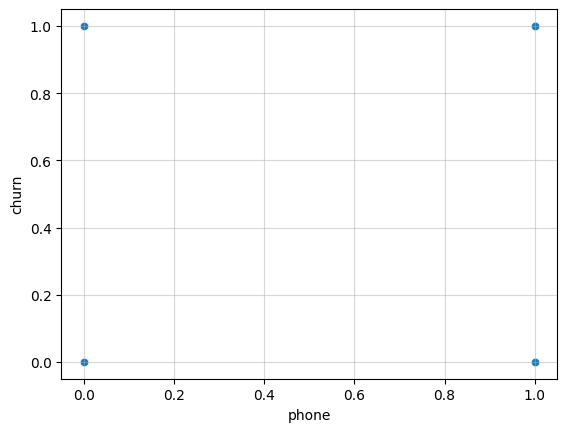

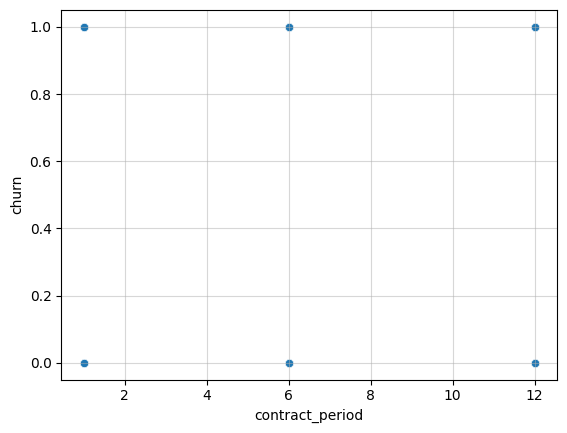

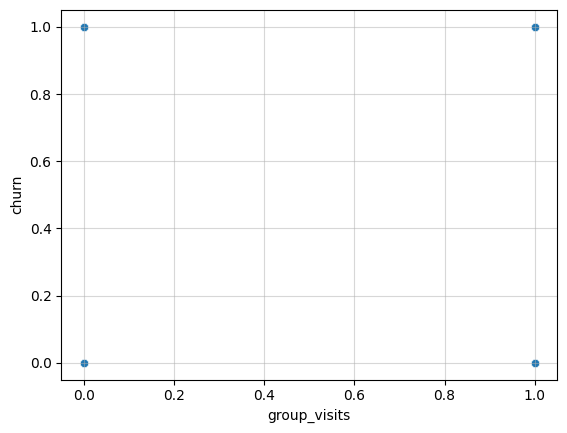

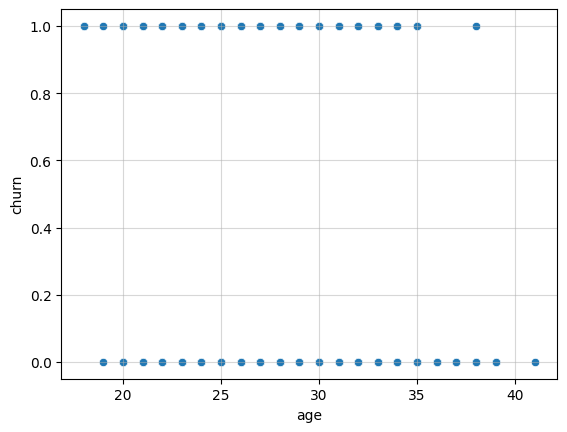

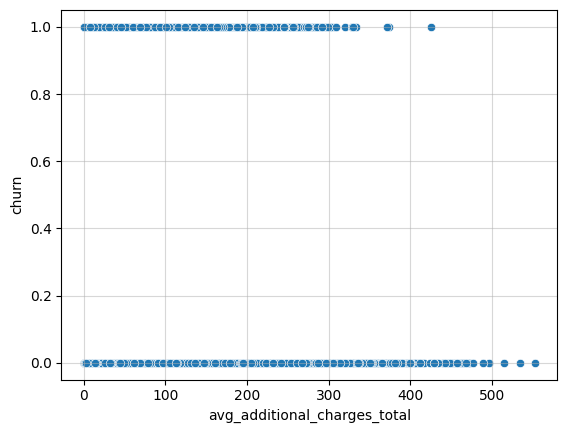

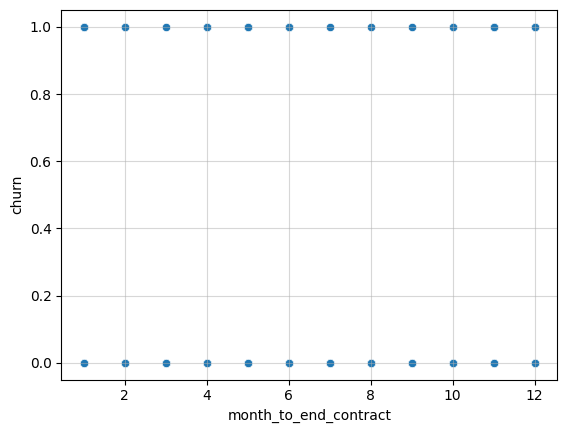

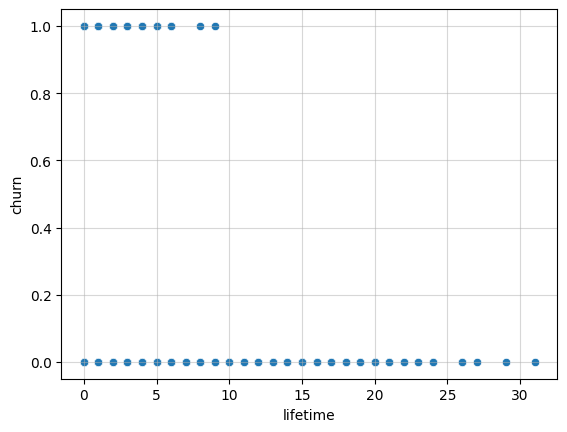

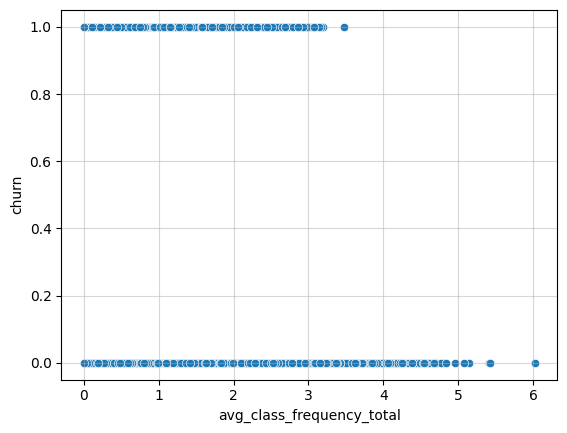

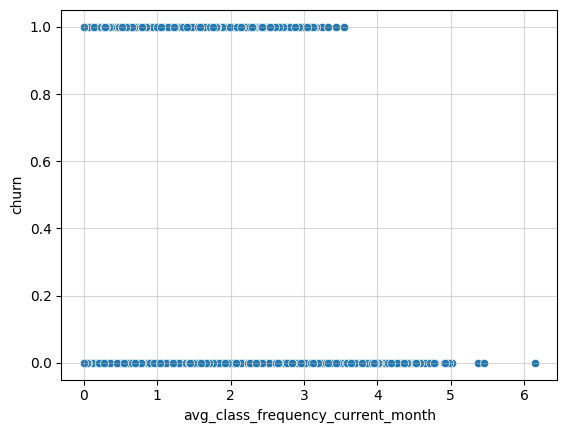

In [15]:
for col in df.drop('churn', axis=1).columns:
    sns.scatterplot(x=df[col], y=df['churn'])
    plt.grid(True , alpha=0.5)
    
    plt.show()

This provides an alternative perspective on the previously established findings, reinforcing the analysis by identifying key and related variables such as class attendance frequency and gym tenure.

### Correlation Heatmap Analysis

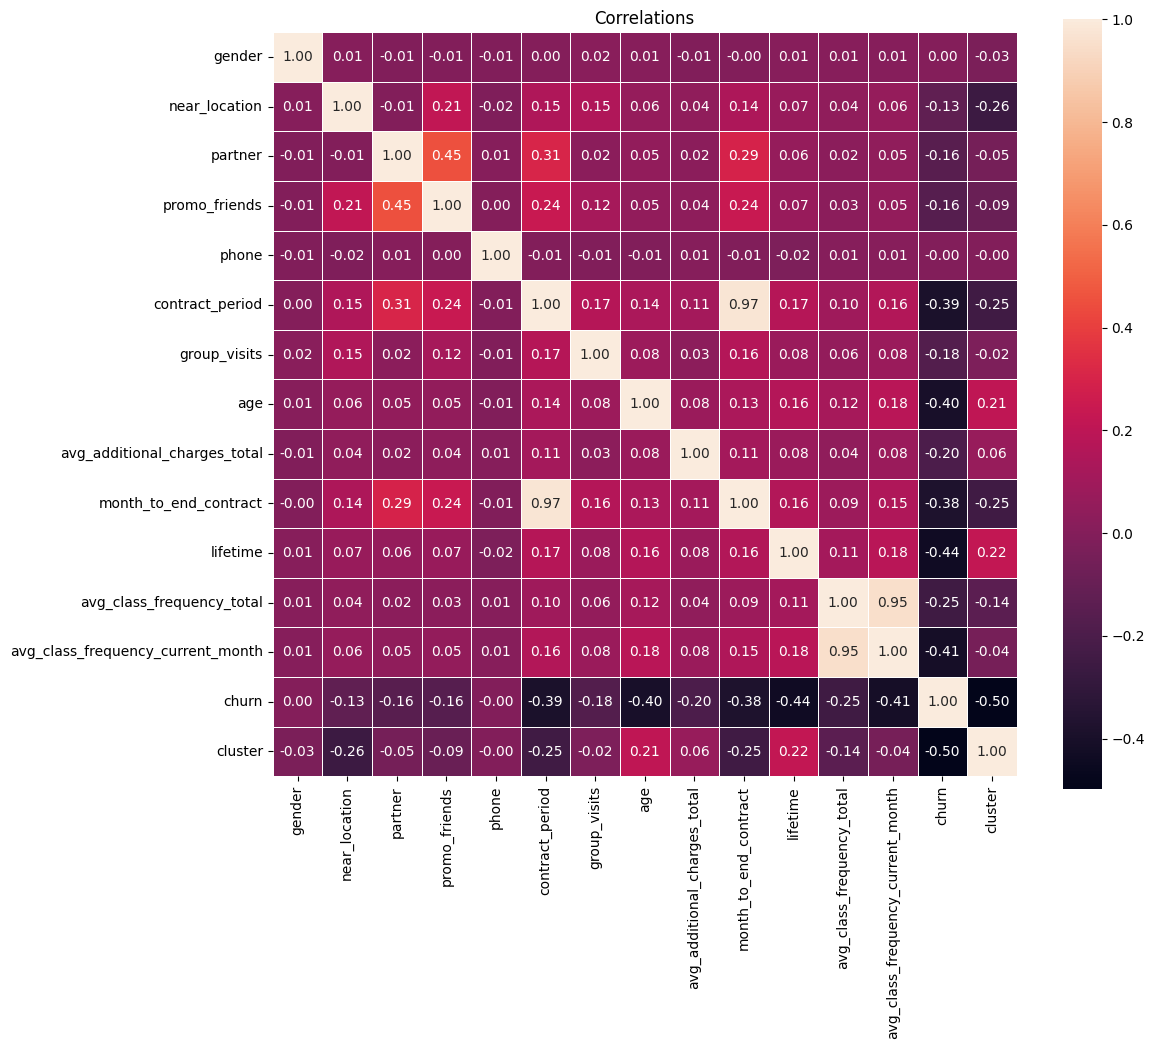

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            square=True,)

plt.title("Correlations")
plt.show()

The variables with the strongest negative correlation with churn, thus contributing to customer retention, are age and contract duration. Consequently, those who utilize the gym services more frequently also tend to stay longer. It is important to attract younger demographics, keeping this in mind, and to promote longer-term membership plans to improve retention.

## Building a Model to Predict User Churn

### Divide Data into Training and Validation Sets Using train_test_split()

In [17]:
X = df.drop('churn',axis=1) # Caracteristicas
y =df['churn'] #Churno lo que queremos predecir

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state=0)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train) #estandatiza los datos de entrenamiento

StandardScaler()

In [20]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test) #transforma los datos entrenados y los de prueba

### For Logistic Regression

In [21]:
model = LogisticRegression(max_iter=1000 ,random_state=0) #inicialmente sale error por cantidad de iteraciones por tanto se aumenta el rango
model.fit(X_train_st , y_train) 
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:,1]#para predecir cuantos se van a ir

### For Random Forest

In [22]:
bmodel = RandomForestClassifier(n_estimators=100 , random_state=0)
bmodel.fit(X_train_st , y_train)
bpredictions = bmodel.predict(X_test_st)
bprobabilities = bmodel.predict_proba(X_test_st)[:,1]#para predecir cuantos se van a ir


### Evaluate Accuracy, Precision, and Recall for Both Models Using Validation Data. Compare the Models. Which Model Yielded Better Results?


In [43]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification Metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [44]:
print_all_metrics(y_test,bpredictions,bprobabilities, title = 'Random Forest Metrics:')

Random Forest Metrics:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


In [45]:
print_all_metrics(y_test,predictions,probabilities, title = 'Logistic Regression:')

Logistic Regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


Despite presenting very, very similar metrics, the decision is made to implement Logistic Regression due to its better recall and higher precision.

### ROC Curve

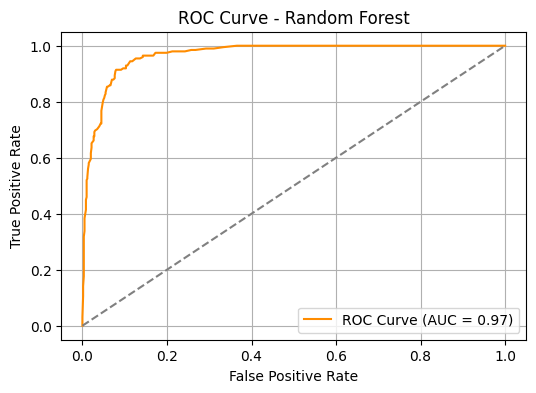

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, bprobabilities)
roc_auc = roc_auc_score(y_test, bprobabilities)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Confusion Matrix

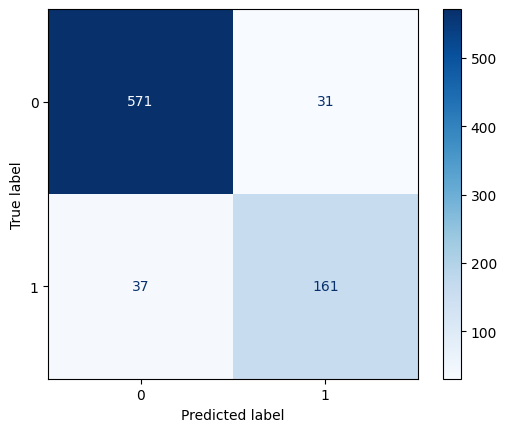

In [27]:
# y_test = etiquetas verdaderas
# bpredictions = predicciones del modelo
cm = confusion_matrix(y_test, bpredictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

The Random Forest model demonstrates exceptional performance:

Achieving an overall accuracy of 91%.

Crucially, it accurately identifies 81.3% of users likely to churn (recall).

Its strong ability to differentiate between churners and non-churners is further validated by an AUC of 0.97, indicating a high degree of predictive capability.

These results suggest the model is highly valuable for the gym to proactively implement targeted retention strategies for customers with a high propensity to churn.

## Create User Clusters

In [28]:
sc = StandardScaler() #Estandarizar los datos
x_sc = sc.fit_transform(df)
linked = linkage(x_sc, method = 'ward')

### Dendogram

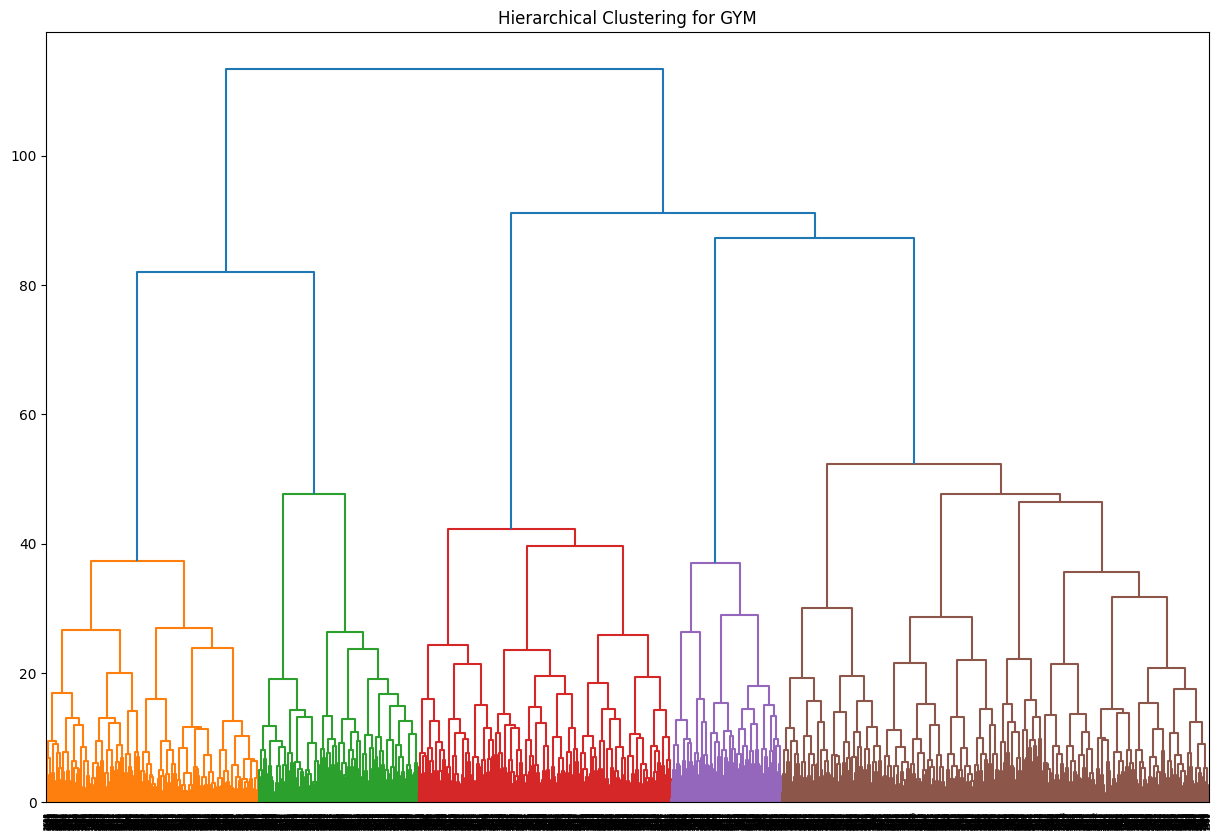

In [48]:
plt.figure(figsize=(15, 10))  
dendrogram(linked)
plt.title('Hierarchical Clustering for GYM')
plt.show()

5 potential groups, recommended based on the cluster analysis, have been identified.







### Train the Clustering Model with the K-means Algorithm and Predict Customer Clusters.

In [30]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(x_sc)

### Look at the Mean Feature Values for the Clusters. Is There Anything That Catches Your Attention?

In [31]:
df['cluster'] = labels
df.groupby(['cluster']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.512563,1.000000,0.329146,0.219849,0.899497,1.610553,0.292714,26.947236,114.163411,1.560302,0.968593,1.479996,1.050512,0.998744
1,0.512770,0.945972,0.764244,0.549116,0.901768,11.381139,0.558939,29.887033,163.632184,10.438114,4.703340,2.001689,1.996309,0.016699
2,0.550656,0.951132,0.368296,0.258641,0.912992,2.870083,0.470799,30.129917,162.498711,2.630513,4.773540,2.969324,2.977856,0.003576
3,0.498084,0.000000,0.467433,0.074713,0.913793,2.160920,0.206897,28.421456,132.099922,2.036398,2.674330,1.599838,1.401074,0.469349
4,0.471515,0.998788,0.429091,0.295758,0.893333,2.813333,0.416970,29.996364,151.552358,2.609697,4.774545,1.180491,1.175727,0.001212


Analyzing the cluster divisions reveals key factors highlighted by the model. Contract period significantly segmented the groups, with average durations approximating 3 months (two clusters), 5 months, 1 month, and 11 months. The model also segmented based on lifetime, distinguishing those with less than a month's tenure. Finally, churn was a differentiating factor, with one cluster having an average churn rate near 1, another at 0.26 (around one-quarter), and the remaining clusters showing averages closer to 0, indicating a higher likelihood of retention.

### Plot Feature Distributions for the Clusters


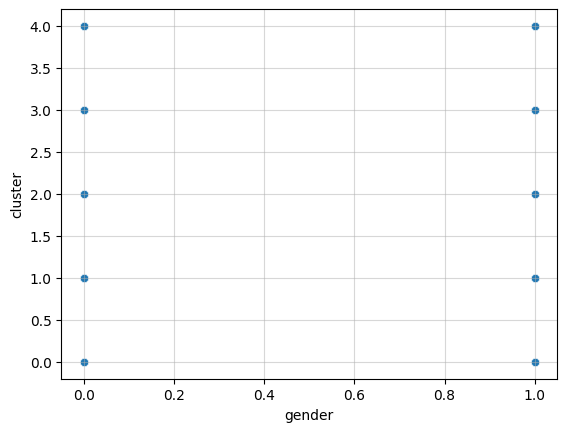

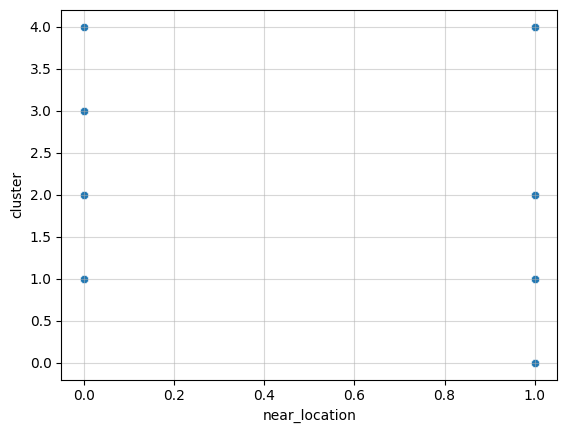

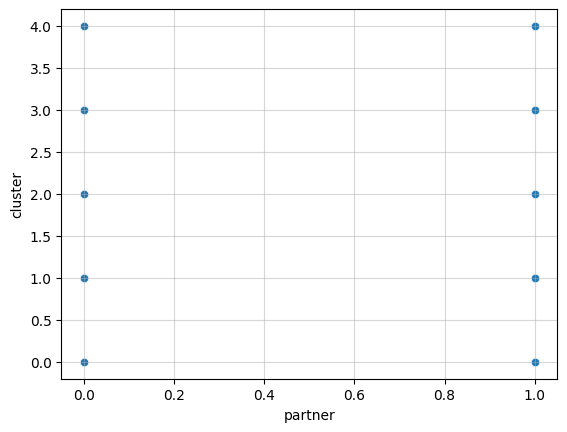

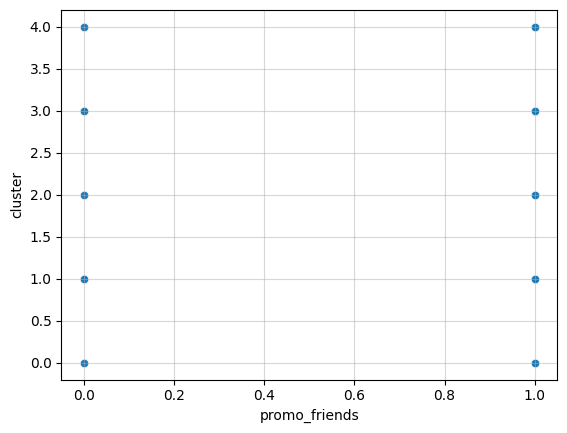

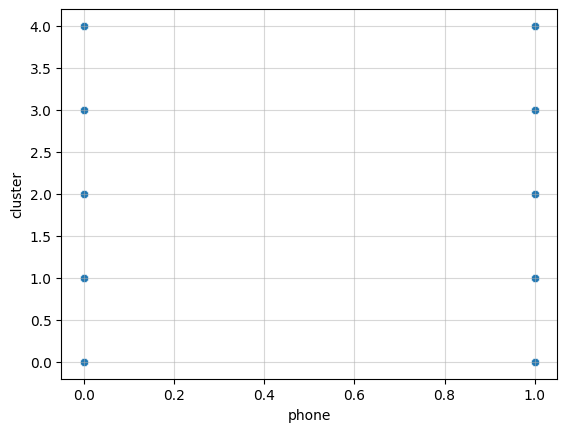

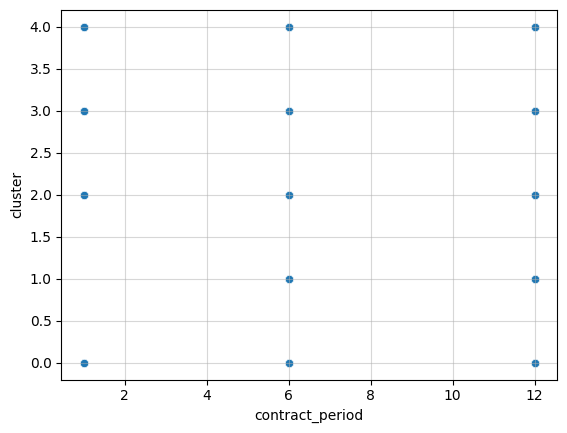

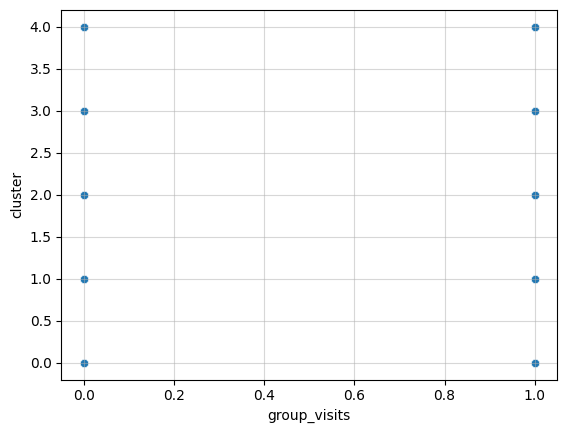

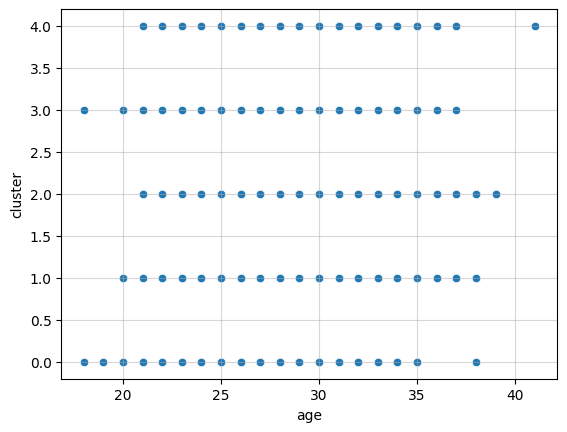

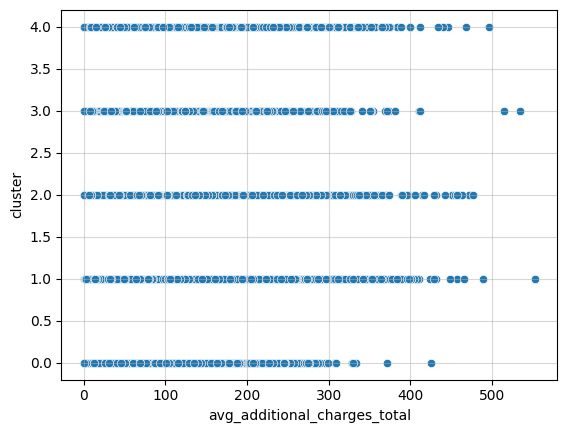

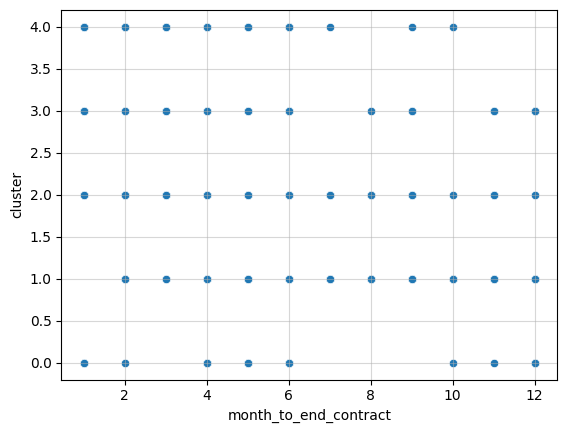

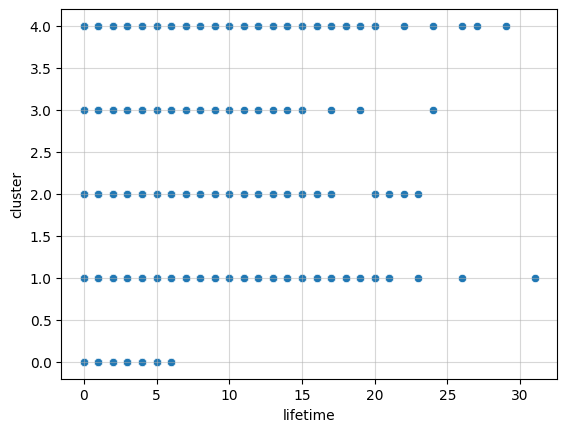

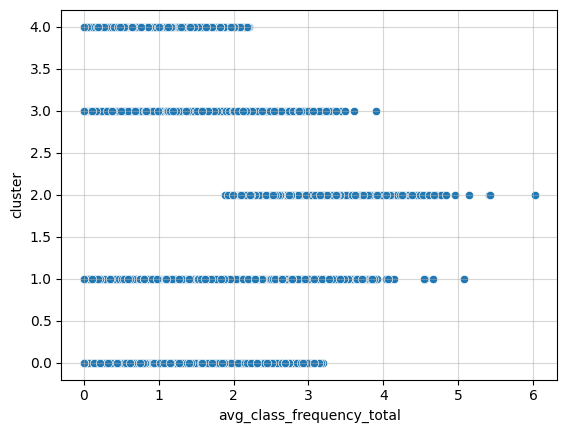

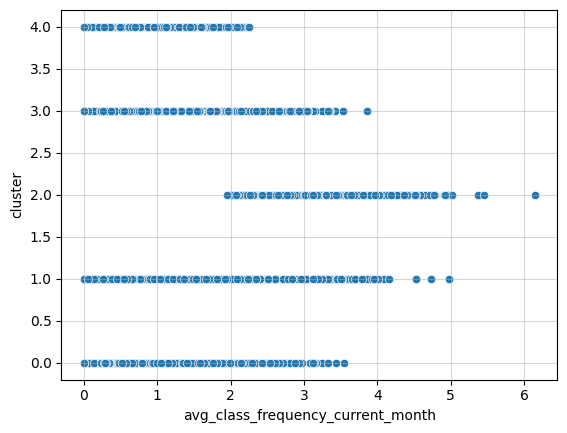

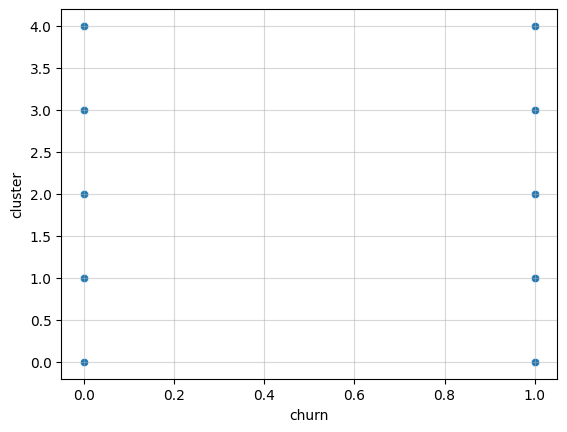

In [32]:
for col in df.drop('cluster', axis=1).columns:
    sns.scatterplot(x=df[col], y=df['cluster'])
    plt.grid(True , alpha=0.5)
    
    plt.show()

These distributions significantly simplify the identification of key insights. The model clearly clustered based on contract period and also showed some segmentation by age, with younger individuals predominantly in cluster 1. This corroborates our earlier hypothesis that this demographic tends to spend less. Furthermore, the distributions related to 'months to end of contract' suggest a potential gap around the 8-month mark, as clusters 1 and 0 show peaks at 6 and then again around 10 months. Regarding 'lifetime' and clusters, it's straightforward to see that cluster 1 members have the shortest lifespans, making them a clear target audience. Interestingly, despite the above, this group doesn't have the lowest class attendance rate; that distinction belongs to cluster 0. Upon reviewing the age distribution, cluster 0 comprises older individuals, where factors like commitments or responsibilities might explain lower attendance. Developing targeted pricing or marketing strategies to retain our younger audience is crucial, as they represent a foundation for building long-term customer loyalty, even if their current spending is lower.

### Calculate the Churn Rate for Each Cluster. Do They Differ in Terms of Churn Rate? Which Groups Are Likely to Leave, and Which Are Loyal?








In [33]:
df.groupby('cluster')['churn'].mean()

cluster
0    0.998744
1    0.016699
2    0.003576
3    0.469349
4    0.001212
Name: churn, dtype: float64

## Conclusions

- **High Churn Risk (Cluster 1):** This group, with a striking 0.997 churn rate, demands immediate attention. Characterized by a younger average age (26), lower spending, preference for short-term/budget plans, lower participation in 'promo friends' and group visits, and greater distance from the gym. Notably, they primarily pay for their own memberships and spend the least. **Recommendation:** Implement targeted retention strategies focusing on engagement, value perception, and addressing potential barriers like location. Consider integration events to foster community.

- **High Loyalty (Cluster 0):** This valuable segment, with a very low 0.001156 churn rate, should be understood deeply. Key traits include higher participation in the partner program (indicating employment and potentially indirect payment), a tendency for 3-month plans (possibly linked to corporate agreements), and an older average age (30). Interestingly, they have the lowest class attendance. **Insight:** While loyal, their low engagement suggests reliance on external factors (corporate benefits). **Opportunity:** Explore strategies to increase their gym engagement to build more intrinsic loyalty.

- **Contextual Understanding:** Our environment favors corporate partnerships and values premium extra services, aligning with a demographic where many are over 27 and likely have disposable income.

- **Strategic Options:**
    1.  **Focus on Corporate Leadership:** Expand the commercial team and outreach to capitalize on the high-loyalty corporate segment.
    2.  **Target Younger Demographics:** Implement social media campaigns and tailored promotions (group discounts, plan pricing adjustments) to engage the high-churn younger audience.

- **Action Plan:** Initiate a quarterly plan for either strategy to monitor changes in contract durations. Re-evaluate after three months with a similar analysis, including marketing costs.

- **Next Steps:** Develop a detailed plan based on the chosen strategic direction, continuously monitoring key metrics and marketing ROI.